# Imports

In [4]:
import cv2
import numpy as np

# Recording from a Webcam

In [ ]:
import cv2

# Recrod video from webcam number 0
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame returns a bool (True/False). 
    # If frame is read correctly, it will be True.
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [5]:
import cv2

def red_filter(hsv: np.ndarrar) -> np.ndarray:
    

def main():
    
    WINDOW_NAME = "Robotics Project"
    cv2.namedWindow(WINDOW_NAME) # open a window to show debugging images
    vc = cv2.VideoCapture(0) # Initialize the default camera
    
    try:
        if vc.isOpened(): # try to get the first frame
            (readSuccessful, frame) = vc.read()
        else:
            raise(Exception("failed to open camera."))
            readSuccessful = False
    
        while readSuccessful:
            # Export image in HSV format
            _ = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
            # Keep only pixels with high saturation and "high hue" (large hue values correspond to red)
            mask = (_[:,:,1] > 230) & (_[:,:,0] > 160)
            # Display the [:,:,1] the saturation
            cv2.imshow('frame', _[mask])
            # Perform various actions on frame
                #pupilOffsetXYList = getOffset(frame, allowDebugDisplay=True)
            # Set refreshing time
            key = cv2.waitKey(10)
            if key == 27: # exit on ESC
                #cv2.imwrite( "lastOutput.png", frame) #save the last-displayed image to file, for our report
                break
            # Get Image from camera
            readSuccessful, frame = vc.read()
    finally:
        vc.release() #close the camera
        cv2.destroyWindow(WINDOW_NAME) #close the window

# Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
from tensorboard.backend.event_processing import event_accumulator
import tensorflow as tf
import glob
import os
tf.logging.set_verbosity(tf.logging.ERROR)

# Load Tensorboard Log

In [26]:
def load_tf(dirname, basedir):
    prefix = basedir
    dirname = prefix + dirname
    dirname = glob.glob(dirname + '/*')[0]
    
    ea = event_accumulator.EventAccumulator(dirname, size_guidance={event_accumulator.SCALARS: 0})
    ea.Reload()
    dframes = {}
    mnames = ea.Tags()['scalars']
    
    for n in mnames:
        dframes[n] = pd.DataFrame(ea.Scalars(n), columns=["wall_time", "epoch", n.replace('val/', '')])
        dframes[n].drop("wall_time", axis=1, inplace=True)
        dframes[n] = dframes[n].set_index("epoch")
    return pd.concat([v for k,v in dframes.items()], axis=1)

def load_tf_jobs(regex, basedir):
    prefix = basedir + "results/"
    job_dirs = glob.glob(prefix + regex)

    rows = []
    for job in job_dirs:
        job_name = os.path.basename(os.path.normpath(job))
        
        # this loads in all the hyperparams from another file,
        # do your own thing here instead
        options = load_json(job + '/opt.json')
        try:
            results = load_tf(job.replace(prefix, ''), basedir)
        except:
            continue

        for opt in options:
            results[opt] = options[opt]
        rows.append(results)

    for row in rows:
        row['epoch'] = row.index
        row.reset_index(drop=True, inplace=True)
    df = pd.concat(rows)
    return df

In [43]:
import os
run = "trial_2/"
basedir = "/Users/arthurvandenhoeke/Documents/EhB/courses/Robotics/Project/src/"
runs = os.listdir(basedir + run)
idx = np.sort([[int(n) for n in e if n.isdigit()][0] for e in list(map(lambda x: x.split('_'), runs))])

In [44]:
runs

['run_2', 'run_5', 'run_4', 'run_3', 'run_6', 'run_1', 'run_8', 'run_7']

In [45]:
idx

array([1, 2, 3, 4, 5, 6, 7, 8])

In [46]:
res = pd.concat([load_tf(dirname="run_" + str(i), basedir=basedir+run) for i in idx])
res = res.reset_index(drop=True)
res.index = np.asarray(list(res.index))*8

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwri

Text(0, 0.5, 'Discounted reward')

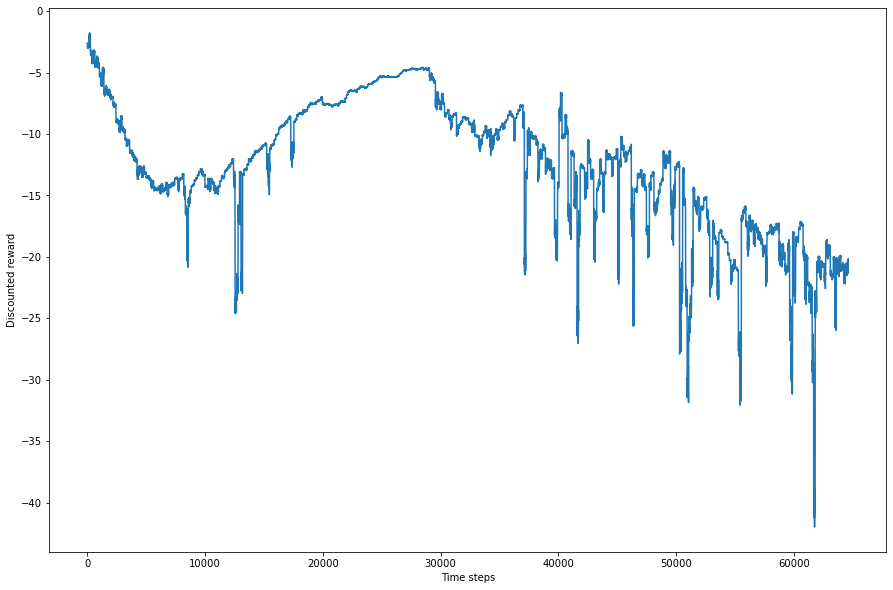

In [47]:
plt.figure(figsize=(15,10))
plt.plot(res["input_info/discounted_rewards"])
plt.xlabel("Time steps")
plt.ylabel("Discounted reward")

In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

In [19]:
def gaussian(x: float, y: float) -> float:
    return np.exp(-(x**2 + y**2))

In [20]:
X = np.arange(-1, 1, 0.01)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = 1-np.exp(R)

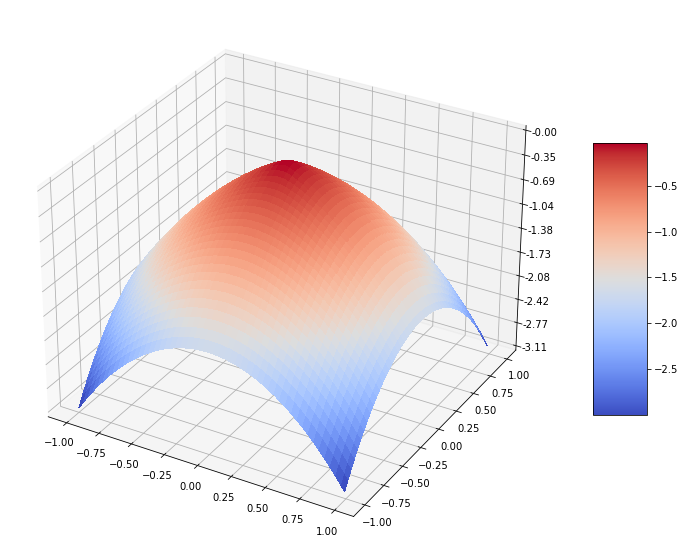

In [21]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()